# Evaluacion de modelos

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
session = tf.Session()

## Caso de regresion

In [19]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

batch_size = 25

In [20]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8),replace=False)

In [21]:
train_idx

array([ 71, 103,  34,  61,  13, 199,  68,  48,  11,  82,  44, 106, 186,
       134,  86, 105, 179, 137,  39, 112, 107,   8, 167, 100, 194,  81,
        12, 153,  52, 109,  59, 163,  64, 142, 160,  72, 121, 122,  74,
        27,  22, 154,  79,  98, 155, 147,  26, 162, 170, 113,  56,  73,
       191, 144, 150,  20,  46,  76, 127, 123,  54, 164,  40,  57,  17,
       165,  63,  23,  66, 110,   6, 145,  65,  21, 157, 138, 104, 130,
       188, 178, 156, 114,  16, 136,  30,  92, 195, 102,  43,   1, 177,
         3, 190, 126, 182, 174,  38,  14,  15,  19, 161, 192,  35, 158,
        85, 184, 143, 183,  87, 115,   4, 198,   5,  58,  60,  55, 171,
        37,  28,  45,  80, 169,  69,  83,  91,   0, 108,  47, 187, 189,
        50, 117, 140,  94, 132, 118,   7, 180,  41,  29, 139, 166, 196,
       141,  53,  75,  36, 175,  49, 151, 124,  51,  90, 111, 101, 181,
       119,  25,  18, 129])

In [22]:
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [23]:
test_idx

array([128,   2, 131, 133, 135,   9,  10, 146, 148, 149,  24, 152,  31,
        32,  33, 159, 168,  42, 172, 173, 176, 185,  62, 193,  67, 197,
        70,  77,  78,  84,  88,  89,  93,  95,  96,  97,  99, 116, 120,
       125])

In [24]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [25]:
my_prediction = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_prediction-y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_optim.minimize(loss)
init = tf.global_variables_initializer()
session.run(init)

In [26]:
for i in range(300):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_idx]])
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    if (i+1)%20==0:
        print('Paso #'+str(i+1)+ ", A="+str(session.run(A))+", Loss ="+
              str(session.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Paso #20, A=[[4.71835]], Loss =27.40543
Paso #40, A=[[7.6253953]], Loss =5.398242
Paso #60, A=[[8.908709]], Loss =2.2124093
Paso #80, A=[[9.453235]], Loss =1.2219701
Paso #100, A=[[9.7185755]], Loss =0.9732567
Paso #120, A=[[9.804294]], Loss =0.82157624
Paso #140, A=[[9.853465]], Loss =0.5747979
Paso #160, A=[[9.808698]], Loss =0.60115075
Paso #180, A=[[9.827455]], Loss =0.89279366
Paso #200, A=[[9.833421]], Loss =0.70866483
Paso #220, A=[[9.839203]], Loss =1.1625901
Paso #240, A=[[9.847586]], Loss =0.78613925
Paso #260, A=[[9.850896]], Loss =0.7161538
Paso #280, A=[[9.832524]], Loss =0.7848965
Paso #300, A=[[9.864699]], Loss =0.9271405


### Evaluación del modelo con MSE

In [27]:
mse_train = session.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
mse_test = session.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
print("MSE en el conjunto de entrenamiento "+str(np.round(mse_train, 3)))
print("MSE en el conjunto de testing "+str(np.round(mse_test, 3)))

MSE en el conjunto de entrenamiento 0.815
MSE en el conjunto de testing 0.795


## Caso de clasificación

In [40]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [41]:
batch_size = 25
x_vals = np.concatenate((np.random.normal(-2,1,100), np.random.normal(2,1,100)))
y_vals = np.concatenate((np.repeat(0.0, 100), np.repeat(1.0,100)))

x_data = tf.placeholder(shape=[1,None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1,None], dtype = tf.float32)

In [42]:
train_idx = np.random.choice(len(x_vals), size=round(len(x_vals)*0.8), replace=False)
test_idx = np.array(list(set(range(len(x_vals)))-set(train_idx)))

In [43]:
x_vals_train = x_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_train = y_vals[train_idx]
y_vals_test = y_vals[test_idx]
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [44]:
my_prediction = tf.add(x_data, A)
init = tf.global_variables_initializer()
session.run(init)

In [45]:
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optim.minimize(xentropy)

In [46]:
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_idx]]
    rand_y = [y_vals_train[rand_idx]]
    session.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if(i+1)%100==0:
        print("Paso #"+str(i+1)+", A = "+str(session.run(A))+
             "Loss = "+str(session.run(xentropy, feed_dict={x_data: rand_x, y_target:rand_y})))

Paso #100, A = [6.194981]Loss = 1.4342675
Paso #200, A = [3.7817934]Loss = 1.4343911
Paso #300, A = [2.0928981]Loss = 0.5885054
Paso #400, A = [1.1028663]Loss = 0.28060263
Paso #500, A = [0.5879506]Loss = 0.21589833
Paso #600, A = [0.32555073]Loss = 0.177493
Paso #700, A = [0.18313445]Loss = 0.19284311
Paso #800, A = [0.094752]Loss = 0.18268223
Paso #900, A = [0.04040843]Loss = 0.19735427
Paso #1000, A = [0.02750162]Loss = 0.16215971
Paso #1100, A = [0.06073669]Loss = 0.2388901
Paso #1200, A = [0.03344138]Loss = 0.21021333
Paso #1300, A = [0.00033472]Loss = 0.19733359
Paso #1400, A = [-0.00217024]Loss = 0.22913584
Paso #1500, A = [0.00841406]Loss = 0.2564553
Paso #1600, A = [0.01906986]Loss = 0.11860316
Paso #1700, A = [0.01791268]Loss = 0.19151197
Paso #1800, A = [0.02133212]Loss = 0.19095096
Paso #1900, A = [0.00237528]Loss = 0.19618587
Paso #2000, A = [-0.01209251]Loss = 0.18718174


### Evaluar el modelo con la precisión (Accuracy)

In [47]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [48]:
acc_train = session.run(accuracy, feed_dict={x_data:[x_vals_train], y_target: [y_vals_train]})
acc_test = session.run(accuracy, feed_dict={x_data:[x_vals_test], y_target: [y_vals_test]})

In [49]:
print("Precisión en el conjunto de entrenamiento: "+str(acc_train))
print("Precisión en el conjunto de testing: "+ str(acc_test))

Precisión en el conjunto de entrenamiento: 0.98125
Precisión en el conjunto de testing: 0.975


## Visualizacion

In [50]:
A_result = session.run(A)
A_result

array([-0.01209251], dtype=float32)

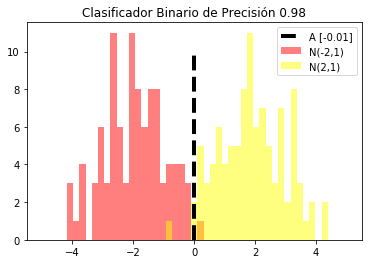

In [51]:
bins = np.linspace(-5,5,50)
plt.hist(x_vals[0:100], bins, alpha=0.5, label = "N(-2,1)", color="red")
plt.hist(x_vals[100:200], bins, alpha=0.5, label="N(2,1)", color="yellow")
plt.plot((A_result, A_result), (0, 10), "k--", linewidth = 4, label = "A "+str(np.round(A_result,2)))
plt.legend(loc="upper right")
plt.title("Clasificador Binario de Precisión "+str(np.round(acc_train,2)))
plt.show()